In [1]:
import numpy as np
import matplotlib.pyplot as plt
from yahoo_fin import stock_info as si
import pickle
import os
# import seaborn as sns
# sns.set()

In [2]:
# model settings

# len input data to train/predict 
WINDOW_SIZE = 30
INITIAL_MONEY = 1000
STARTING_MONEY = INITIAL_MONEY
LAYER_SIZE = 500

# 20% buy and sell at a given time 
MAX_BUY = 5 # INITIAL_MONEY//20  
MAX_SELL = 5 # INITIAL_MONEY//20
TICKER  = 'spy'

# training dataset 
start_date = '01/01/1999'
end_date = '01/01/2017'
interval = '1d'

In [3]:
# import stock_info module from yahoo_fin
google = si.get_data(TICKER, start_date, end_date, interval)
close = google.close.values.tolist()
google.head()

,open,high,low,close,adjclose,volume,ticker
1999-01-04,123.3750,125.21875,121.71875,123.03125,83.186729,9450400,SPY
1999-01-05,122.9375,124.87500,122.93750,124.43750,84.137527,8031000,SPY
1999-01-06,125.8125,127.75000,125.75000,127.43750,86.165947,7737700,SPY
1999-01-07,126.3750,127.21875,125.78125,126.81250,85.743378,5504900,SPY
1999-01-08,128.1875,128.50000,125.96875,127.75000,86.377289,6224400,SPY


import pandas as pd
google = pd.read_csv('/Users/huseinzolkepli/Desktop/GOOG.csv')
google.head()

In [4]:
# initialize model and 
from deep_evolution_strategy import Model, Agent 
# if os.path.
#     with open(filename, 'rb') as input:
#         model = pickle.load(input)  
model = Model(input_size = WINDOW_SIZE, layer_size = LAYER_SIZE, output_size = 3)
agent = Agent(
    model = model,
    money = INITIAL_MONEY,
    max_buy = MAX_BUY,
    max_sell = MAX_SELL,
    close = close,
    skip = 1,
)

In [5]:
agent.fit(iterations = 500, checkpoint = 10)

iter 10. reward: 174.782082
iter 20. reward: 318.044734
iter 30. reward: 512.497162
iter 40. reward: 384.977219
iter 50. reward: 621.751628
iter 60. reward: 704.448134
iter 70. reward: 723.975166
iter 80. reward: 774.422714
iter 90. reward: 637.531320
iter 100. reward: 668.821709
iter 110. reward: 722.392083
iter 120. reward: 789.840822
iter 130. reward: 872.586255
iter 140. reward: 786.519685
iter 150. reward: 791.466727
iter 160. reward: 907.309417
iter 170. reward: 823.177962
iter 180. reward: 814.559344
iter 190. reward: 736.732549
iter 200. reward: 944.889312
iter 210. reward: 927.951115
iter 220. reward: 867.912141
iter 230. reward: 970.922279
iter 240. reward: 968.911853
iter 250. reward: 1074.256154
iter 260. reward: 1041.228753
iter 270. reward: 1164.629776
iter 280. reward: 1069.528529
iter 290. reward: 1072.836039
iter 300. reward: 1154.623418
iter 310. reward: 1143.356116
iter 320. reward: 1151.632675
iter 330. reward: 1120.975404
iter 340. reward: 1236.878588
iter 350. rew

In [6]:
# import stock_info module from yahoo_fin
start_date = '01/01/2020'
end_date = None # '01/01/2017'
google = si.get_data(TICKER, start_date, end_date, interval = '1d')
close = google.close.values.tolist()
agent.close = close
google.tail()

,open,high,low,close,adjclose,volume,ticker
2020-03-30,255.699997,262.429993,253.529999,261.649994,261.649994,171369500,SPY
2020-03-31,260.559998,263.329987,256.220001,257.750000,257.750000,194881100,SPY
2020-04-01,247.979996,257.660004,243.899994,246.149994,246.149994,189554600,SPY
2020-04-02,245.190002,252.679993,244.589996,251.830002,251.830002,177660400,SPY
2020-04-03,250.759995,253.320007,245.220001,248.190002,248.190002,135310100,SPY


day 0: buy 5 units at price 1624.349976, total balance -624.349976
day 5, sell 5 units at price 1633.249969, investment 0.547911 %, total balance 1008.899994,
day 15: buy 1 units at price 328.769989, total balance 680.130005
day 16: buy 5 units at price 1617.500000, total balance -937.369995
day 22, sell 5 units at price 1645.299988, investment 400.441051 %, total balance 707.929993,
day 24, sell 1 units at price 333.980011, investment -79.352086 %, total balance 1041.910004,
day 32: buy 1 units at price 338.339996, total balance 703.570007
day 33: buy 5 units at price 1684.750061, total balance -981.180054
day 43, sell 5 units at price 1512.299957, investment 346.976406 %, total balance 531.119904,
day 44: buy 5 units at price 1487.299957, total balance -956.180054
day 46, sell 5 units at price 1442.100067, investment -14.402729 %, total balance 485.920013,
day 47: buy 5 units at price 1371.799927, total balance -885.879913
day 49, sell 5 units at price 1346.600037, investment -9.4600

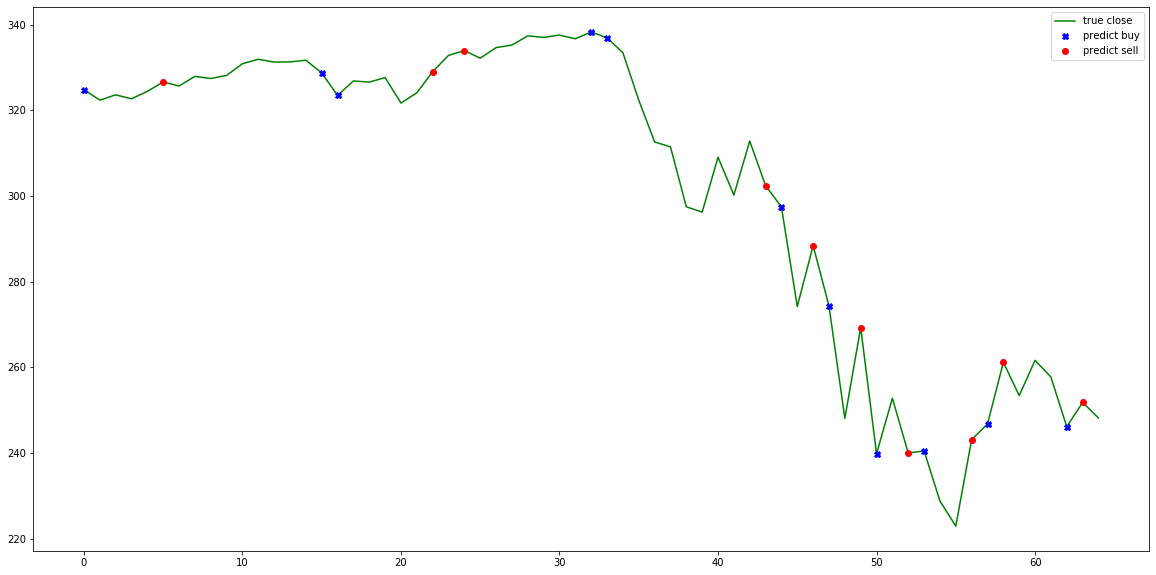

In [7]:
agent.close = close
agent.buy()

In [8]:
filename = 'mymodel.pkl'
filehandler = open(filename, 'wb') 
pickle.dump(model, filehandler)
with open(filename, 'rb') as input:
    loaded_model = pickle.load(input)
loaded_model.weights[0].shape

(30, 500)

In [9]:
filename = 'myagent.pkl'
filehandler = open(filename, 'wb') 
pickle.dump(agent, filehandler)
with open(filename, 'rb') as input:
    loaded_agent = pickle.load(input)

In [10]:
# re-training dataset 
start_date = '01/01/2006'
end_date = '01/01/2011'
interval = '1d'

# import stock_info module from yahoo_fin
google = si.get_data(TICKER, start_date, end_date, interval)
close = google.close.values.tolist()
google.head()

,open,high,low,close,adjclose,volume,ticker
2006-01-03,125.190002,127.000000,124.389999,126.699997,94.888084,73256700,SPY
2006-01-04,126.860001,127.489998,126.699997,127.300003,95.337463,51899600,SPY
2006-01-05,127.150002,127.589996,126.879997,127.379997,95.397354,47307500,SPY
2006-01-06,128.020004,128.580002,127.360001,128.440002,96.191185,62885900,SPY
2006-01-09,128.419998,129.059998,128.380005,128.770004,96.438316,43527400,SPY


In [11]:
loaded_agent.max_buy = 100
loaded_agent.max_sell = 100
loaded_agent.model = loaded_model
loaded_agent.close = close
loaded_agent.fit(iterations = 500, checkpoint = 10)

In [ ]:
agent.max_buy = 100
agent.max_sell = 100
agent.model = loaded_model
agent.close = close
agent.fit(iterations = 500, checkpoint = 10)

iter 10. reward: 129.716988
iter 20. reward: 189.634981
iter 30. reward: 203.580905
iter 40. reward: 184.268951
iter 50. reward: 188.681963
iter 60. reward: 210.132981
iter 70. reward: 233.882982
iter 80. reward: 227.124012
iter 90. reward: 252.847986
iter 100. reward: 189.752013
iter 110. reward: 315.751025
iter 120. reward: 292.066994
iter 130. reward: 328.325004
iter 140. reward: 271.067994
iter 150. reward: 316.126034
iter 160. reward: 334.834999
iter 170. reward: 357.827001
iter 180. reward: 343.128988
iter 190. reward: 337.094007
iter 200. reward: 374.511031
